In [ ]:
import pandas as pd,numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
# ML LIBRARIES:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
 ds=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
ds

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
ds.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
ds.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# boxplot : it is a visual representation of outlier
#churn means people move from job or leave the job

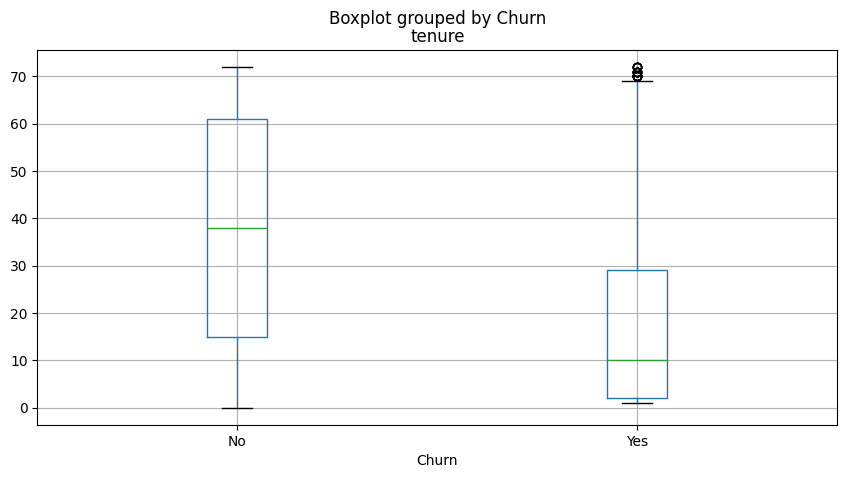

In [ ]:
fig=plt.figure(figsize=(10,5))  #; 10 width,5 height
ax=fig.gca() # gca : get a central axis
ds.boxplot(column='tenure',by='Churn',ax=ax) #  ax prefined parameter in boxplot for axis
#plt.ylabel('tenure')
plt.show()

In [ ]:
# Evaluation Matric: meaure or method use to asses how well a model performs
# Why do we need Evaluation Metrics?
#After training a machine learning model, you want to know:
#Is it accurate? Is it making correct prediction? Does it perform well on unseen data? To answer these, we use evaluation metrics.
# TP, TN, FP, FN-> TP= True Positive, True Negative, False Positive and so on...where Positive/Negative is the prediction done by
#                      Machine and True/False is if the prediction sach hua toh True vrna jhooth hua toh False
# Confusion Matrix : A table show TP, TN, FP, FN
#                  #   Predicted Value
#                  A       P/1   N/0
#                  c       __________
#                  t   P/1| TP |  FN |
#                  u      |____|_____|
#                  a   N/0| FP |  TN |
#                  l      |____|_____|
#              value
#
#
#ACCURACY:% of correct prediction; (TP+TN)/(TP+TN+FP+FN): TOTAL CORRECT PREDICTION/ TOTAL PREDICTION
# PRECISION:of all predicted positive, how many actually correct ?
#             - good for avoiding false positive; formula= (TP)/(TP+FP)
#✅ Example:
#Imagine you're building a model to detect spam emails.
#Your model predicted 100 emails as spam.
#Out of those, only 80 were actually spam.
#So, TP = 80, FP = 20  pecision=80%
# RECALL OR SENSITIVITY: of  all actual positives ,how many did we predict correctly; formula= (TP)/(TP+FN)
# F SCORE: harmonic mean of precision and recall ;formula= 2*precision*recall/precision+recall


In [ ]:
ds['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
ds['churn_class']=ds['Churn'].apply(lambda x:1 if x=='Yes' else 0) # if there is null value in column then it will revert 0

In [ ]:
ds['churn_class'].value_counts()

,count
churn_class,
0,5174
1,1869


In [ ]:
 x=ds[['tenure','MonthlyCharges']] # 2 square bracket -> 2d hotta hai dataframe
 y=ds['churn_class']

In [ ]:
 from sklearn.model_selection import train_test_split
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
 print(x_train.shape) # output is in the form of tuple (rows,input variables)
 print(x_test.shape)
 print(y_train.shape)
 print(y_test.shape)


(5634, 2)
(1409, 2)
(5634,)
(1409,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [ ]:
model=LogisticRegression(fit_intercept=True,max_iter=10000) # the model is allowed to run max 10000 steps to find best solution
model.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
model.coef_

array([[-0.05646759,  0.03315394]])

In [ ]:
model.intercept_

array([-1.77408798])

In [ ]:
train_pred_prob=model.predict_proba(x_train)
test_pred_prob=model.predict_proba(x_test)

In [ ]:
print(train_pred_prob)
print('') # output mein 1st column value is of not happening event, 2nd column is of happening  event
print(test_pred_prob)

[[0.95339643 0.04660357]
 [0.73651805 0.26348195]
 [0.99306617 0.00693383]
 ...
 [0.98739857 0.01260143]
 [0.381796   0.618204  ]
 [0.78978299 0.21021701]]

[[0.71451461 0.28548539]
 [0.78522736 0.21477264]
 [0.53064661 0.46935339]
 ...
 [0.77288764 0.22711236]
 [0.71618079 0.28381921]
 [0.57739896 0.42260104]]


In [ ]:
# to get the predicted class
train_class_pred=model.predict(x_train)
test_class_pred=model.predict(x_test)

In [ ]:
print(train_class_pred)
print(test_class_pred)

[0 0 0 ... 0 1 0]
[0 0 0 ... 0 0 0]


In [ ]:
train_accuracy=accuracy_score(train_class_pred,y_train)
test_accuracy=accuracy_score(test_class_pred,y_test)

[[3745  388]
 [ 819  682]]


<Axes: >

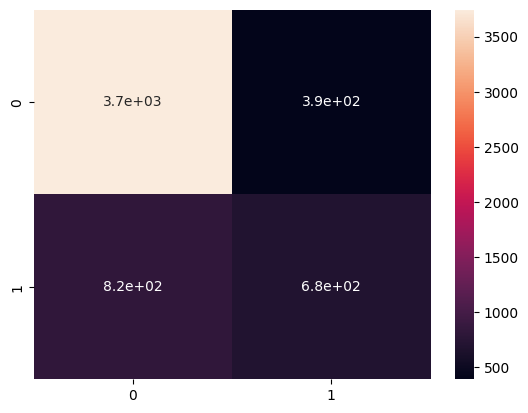

In [ ]:
# confusion matric for train data
#
labels=['Retained','Churn']
train_cm=confusion_matrix(y_train,train_class_pred) # 1st position hame y_train,ya y_test hi rakhna hai
print(train_cm)
x=plt.subplot()
sns.heatmap(train_cm,annot=True,ax=x)
# in graph retained=0,churn=1
# confusion matrix :       (predicted values)
#                          p/1     |     n/0
#                  p/1     TP      |     FN          (ACTUAL VALUES)
#                  n/0     FP      |      TN


In [ ]:
# test_cm
test_cm=confusion_matrix(y_test,test_class_pred) # 1st position hame y_train,ya y_test hi rakhna hai
print(test_cm)

[[934 107]
 [212 156]]


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
precision_cm=precision_score(y_test,test_class_pred)
recall_cm=recall_score(y_test,test_class_pred)
f1_cm=f1_score(y_test,test_class_pred)

In [ ]:
#DECISION TREE( help us to make decision)
#A decision tree is a supervised learning model used for both classification and regression tasks. It represents decisions in a flowchart-like structure, where:
# Root node: being with whose data set,1st decision made based on a feature
#Internal (decision) nodes test a feature (e.g., “Temperature > 20 °C?”).
#Branches correspond to possible outcomes of these tests.
#Leaf nodes assign a final class label (for classification) or a numeric prediction (for regression)

In [ ]:
#Let's say we want to predict whether someone will buy a mobile phone.
#Age	Income	Student	Buys Mobile?
#<25	High	No	No
#25–35	Medium	Yes	Yes
#>35	Low	Yes	No
#The decision tree might look like:
#Is Age < 30?     income > 50k
#             /      \
#           Yes      No
#        Is Student?   Buys: No
#        /     \
#     Yes     No
#  Buys: Yes  Buys: No




In [ ]:
# Algorithm check all the feature to find the one that best split the data
#1.entropy( for information gain)
#2.gini

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier( criterion='entropy',max_leaf_nodes=10,random_state=0)
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [ ]:
print('decision_tree.classes_')
print(decision_tree.classes_)
print('decision_tree')

decision_tree.classes_
[0 1]
decision_tree
